# EDA - EXPLORATORY DATA ANALYSIS

## Introduction
Exploratory Data Analysis or EDA is an approach to analyze data data in order to:

- Summerize main characteristics of data.
- Gain better understanding of the dataset.
- Uncover relationships between variables and extract important variables for the problem we are trying to solve.

  ### Question:
  What are the characteristics that have the most impact on the car price?

 We will learn:
 - Descriptive statistics which describes basic features of dataset and obtain a short summery about the sample and measures of the data.
 - Basic grouping of data using GroupBy and how this can help to transform the dataset.
 - The correlation between different variables
 - Advanced correlation, where we can introduce various correlation statistics method, namely:

   1. **Pearson correlation**
   2. **Correlation Heatmaps**
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, mean_squared_error


from scipy import stats

from scipy.stats import pearsonr # For pearson Correlation
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("automobileEDA.csv")
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470,9.038462,Medium,1,0


# Data Preprocessing

In [3]:
#Check for Missing Values
df.isna().sum()


symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [4]:
df.describe(include = "all")

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,165,115,94,118,198,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,...,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,...,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,...,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,...,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,...,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,...,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

There are variables that can be divided up into different categories or groupd and have discrete values e.g in our dataset, we have drive system as a categorical value which consists of categories **forward wheel-drivel**, **rear wheel-drive** and **four wheel-drive.** 

One way of summerizing the categorical data is by using the function call **value_counts()**

In [6]:
# Count of Categorical Column Drive-Wheels
drive_wheel_col_counts = df['drive-wheels'].value_counts()
drive_wheel_col_counts

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

As we can wee there are 118 cars in the front wheel-drive category, 75 cars in the rear wheel-drive category and finally eight cars in the four wheeel-drive category.

# Visualization

<Axes: xlabel='drive-wheels', ylabel='price'>

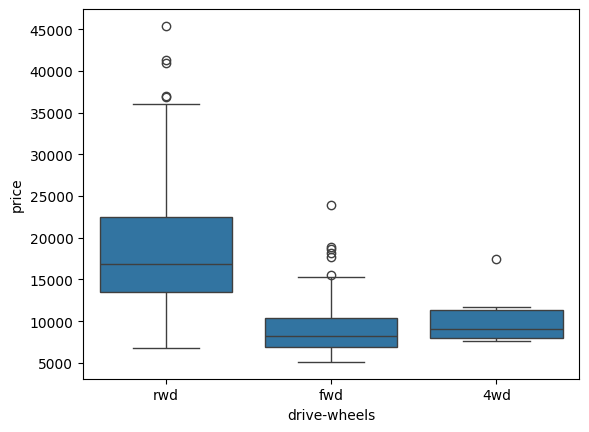

In [7]:
# Boxplots
sns.boxplot(x="drive-wheels", y ="price", data=df)


<Axes: xlabel='num-of-doors', ylabel='price'>

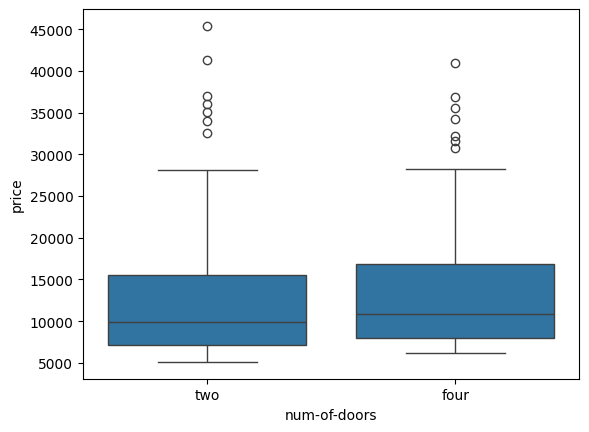

In [8]:
sns.boxplot(x="num-of-doors", y="price", data=df)

By using boxplots, we can see the distributions of different categoories of drive-wheels features over price dependent variable. We can see that the distribution of price between the rear wheel-drive and the other catergories, are distinct while the price of the front wheel-drive and four wheel-drive are almost indistinguishable 

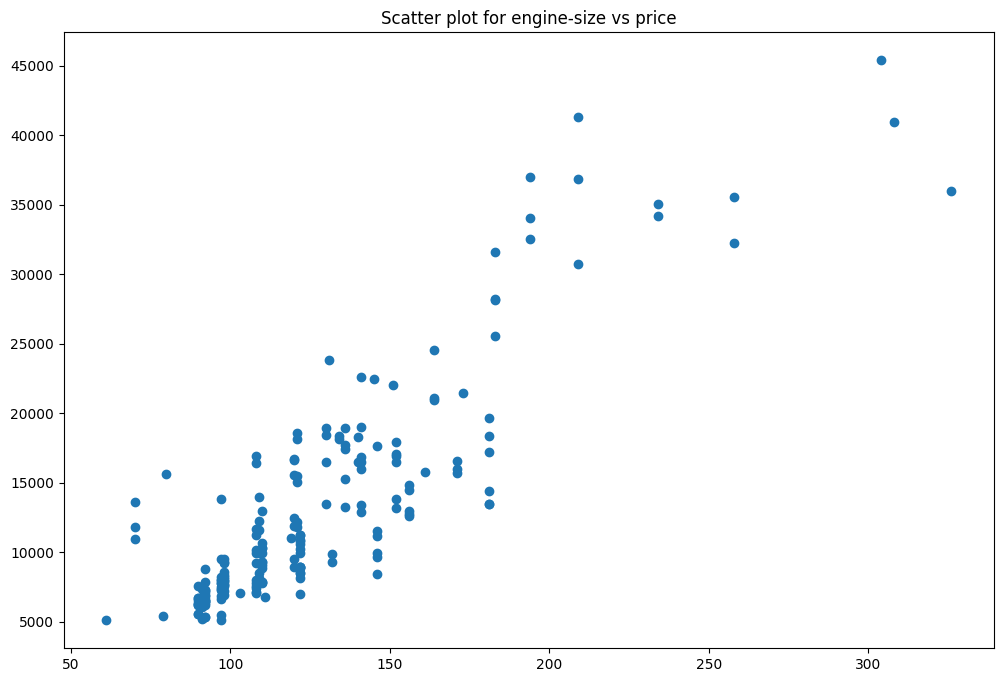

In [9]:
#Scatter Plots
plt.figure(figsize=(12,8))
plt.scatter(x="engine-size", y="price", data=df)
plt.title("Scatter plot for engine-size vs price")
plt.show()

**Now how is the variable engine-size related to price?** 

From the scatter plot, we can see that as the engine-size goes up, the price also goes up. This is giving us an initial indication that there is a positive relationship between the two variables.

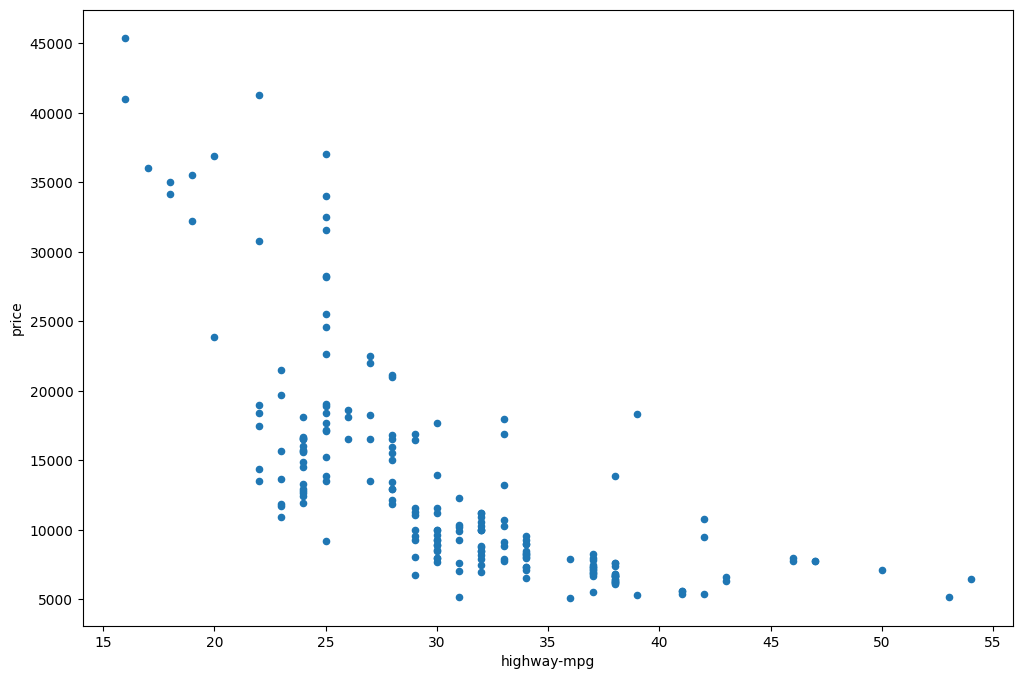

In [10]:
df.plot(kind='scatter', x = 'highway-mpg', y = 'price', figsize=(12,8));

# Group By

In [11]:
df_1 = df[["drive-wheels","price"]]
df_1.head()

,drive-wheels,price
0,rwd,13495
1,rwd,16500
2,rwd,16500
3,fwd,13950
4,4wd,17450


In [12]:
df_grp = df_1.groupby(["drive-wheels"], as_index=False).mean()
df_grp.head()

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [13]:
df_test = df[["drive-wheels", "body-style","price"]]
df_test.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495
1,rwd,convertible,16500
2,rwd,hatchback,16500
3,fwd,sedan,13950
4,4wd,sedan,17450


In [14]:
df[["body-style"]].value_counts()

body-style 
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [15]:
# Group by Drive wheels vs body-size
df_grp = df_test.groupby(["drive-wheels","body-style"], as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [16]:
df_pivt = df_grp.pivot(index = "drive-wheels", columns = "body-style")
df_pivt

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

# Heatmap Plots

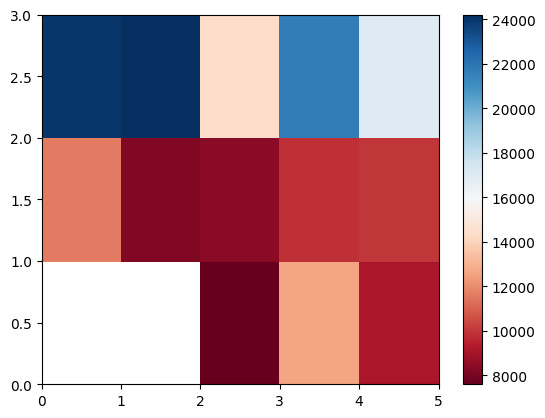

In [17]:
plt.pcolor(df_pivt, cmap="RdBu")
plt.colorbar()
plt.show()

In the above plot, each body-style is numbered along with the x-axis and each type of drive-wheel is numbered along the y-axis. The average price are plotted against the varying colours based on their values accroding to the color bar. We can also see that the top section of the heatmap  seems to have higher prices in the top while the bottom section displays lower prices. 

# Correlation Analysis

(0.0, 53224.67515630838)

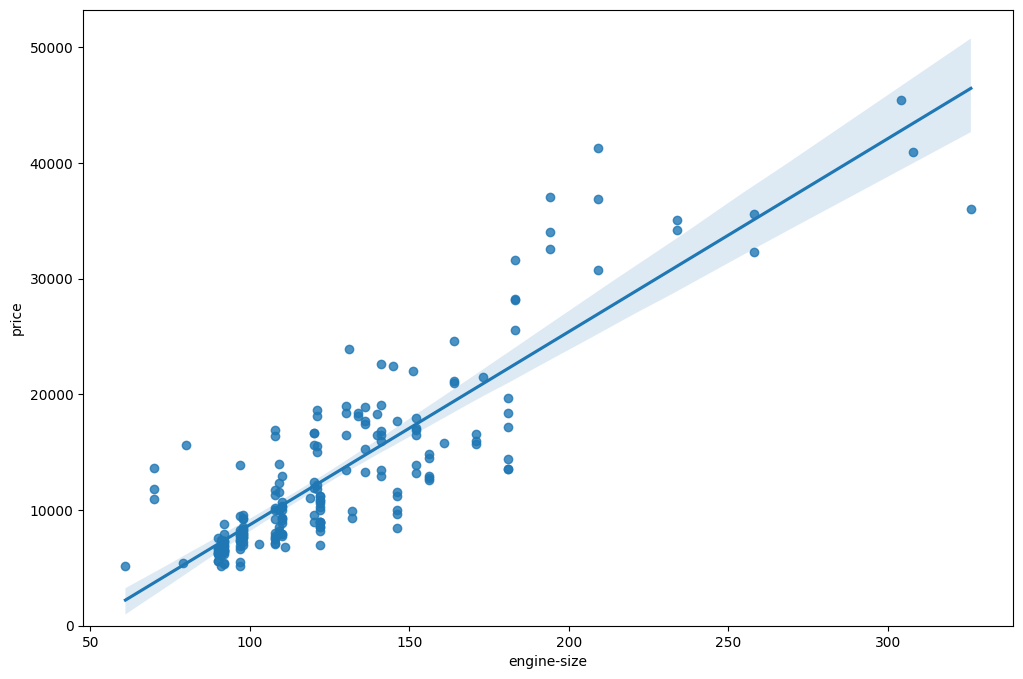

In [18]:
#Visualizing a strong positive correlation between Engine-size and Price
plt.figure(figsize=(12,8))
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

We have visualized these two variables using a scatter plot and added a linear line called **Regression line**, which indicates the relationship between the two. variables The main goal of the plot is to see whether **the engine-size** has any impact on the **Price**

In the above example, we can see that the straight line throught the data points is very steep, which shows that there is a positive linear relationship between the the two variables.

So, we can see that as the engine-size increases as the value of price also increases as well and the slope of the line is positive. We can say that there is a positive correlation between the two variables.

### Visualizing Strong Negative Correlation between Highway per galon vs Price

(0.0, 48174.49779419843)

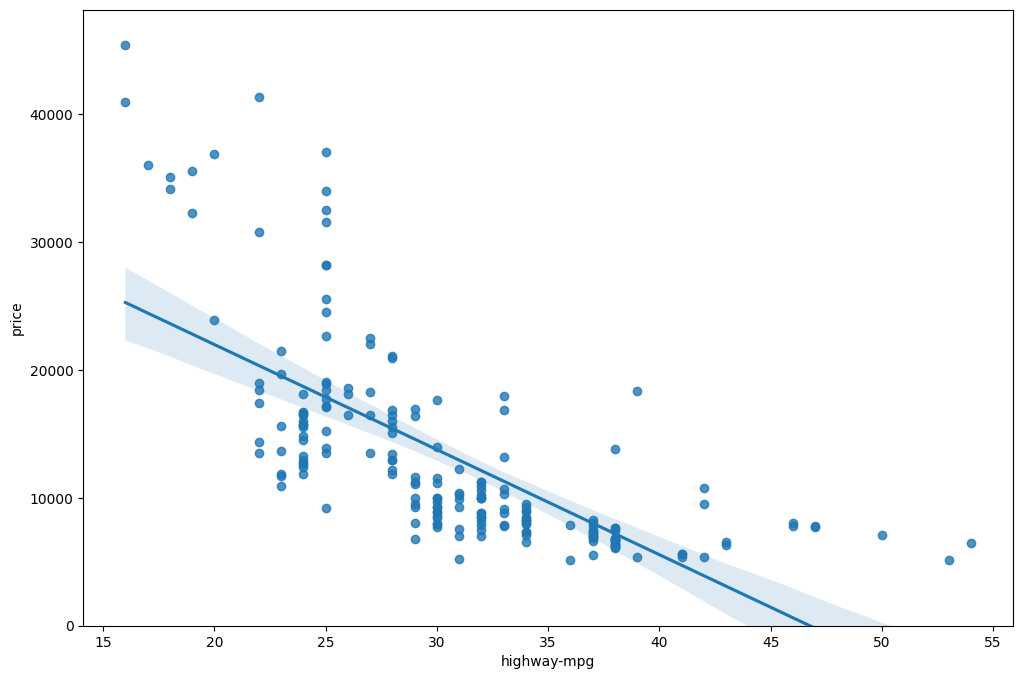

In [19]:
# Visulazing the relationship between Highway miles per galon Vs price **Strong Negative Correlation**
plt.figure(figsize=(12,8))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

As it can be seen from the above plot, when the highway miles per gallon value increases, the value of price reduces. Therefore, there is negative linear relationship between highway mile per gallon and price. Although this relationship is negative, but the slope of the line is steep this implies that the highway miles per gallon can still be a good predictor of price. These two variables are said to have a negative relationship.

### Visualizing a weak correlation between Peak-rpm and price

(0.0, 47414.1)

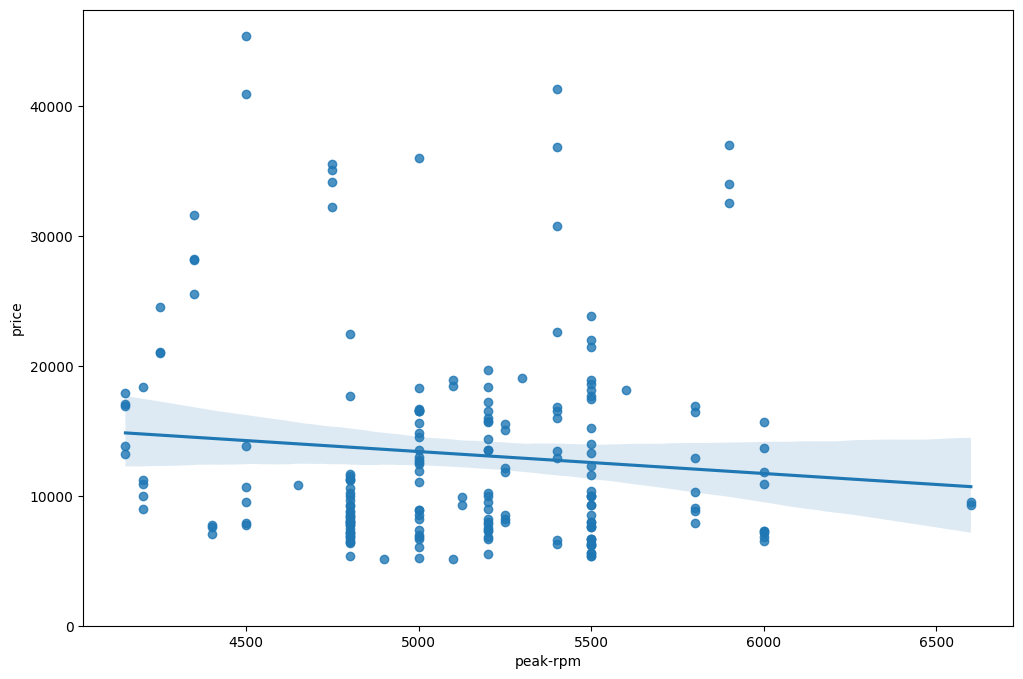

In [20]:
# A weak correlation between Peak-rpm and price
plt.figure(figsize=(12,8))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

# Pearson Correlation and P-value

In [21]:
# Showing of the correlation matrix
df_numeric = df.select_dtypes(include=[float,int])
corr_matrix = df_numeric.corr()

corr_matrix


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


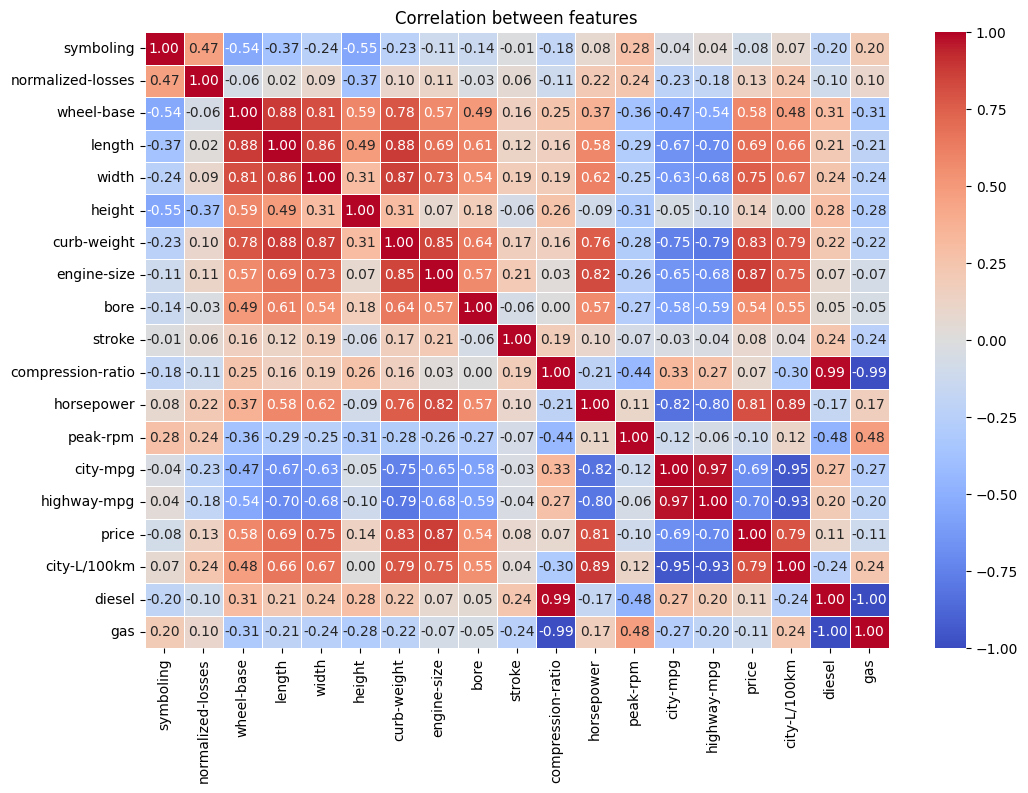

In [22]:
# visualize a heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Correlation between features")
plt.show()

# Feature Selection

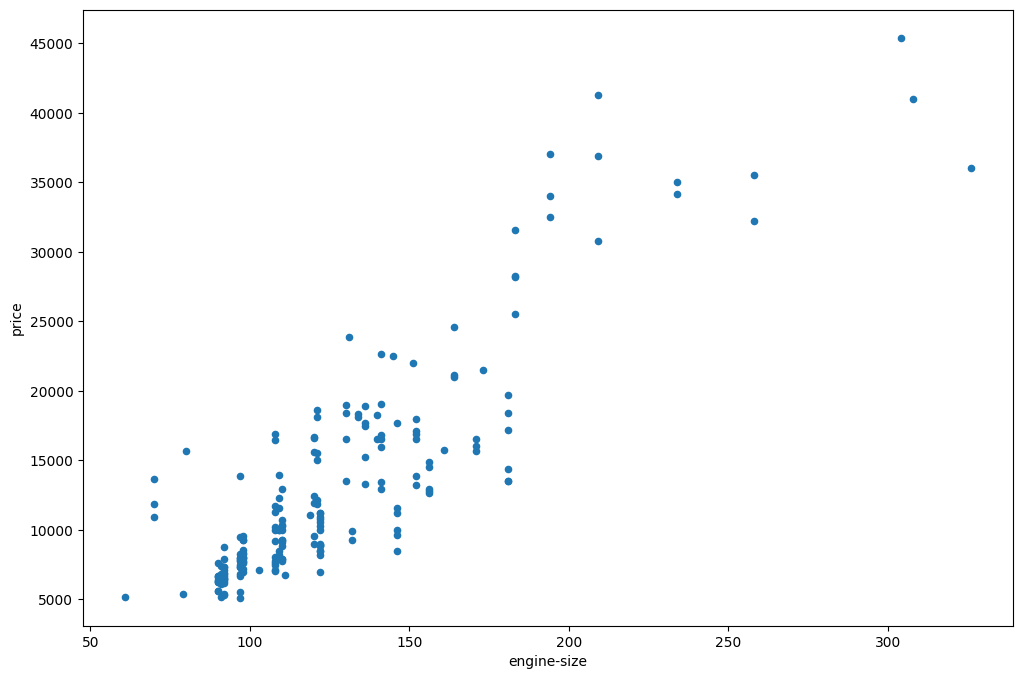

In [23]:
df.plot(kind='scatter', x = 'engine-size', y = 'price', figsize=(12,8));

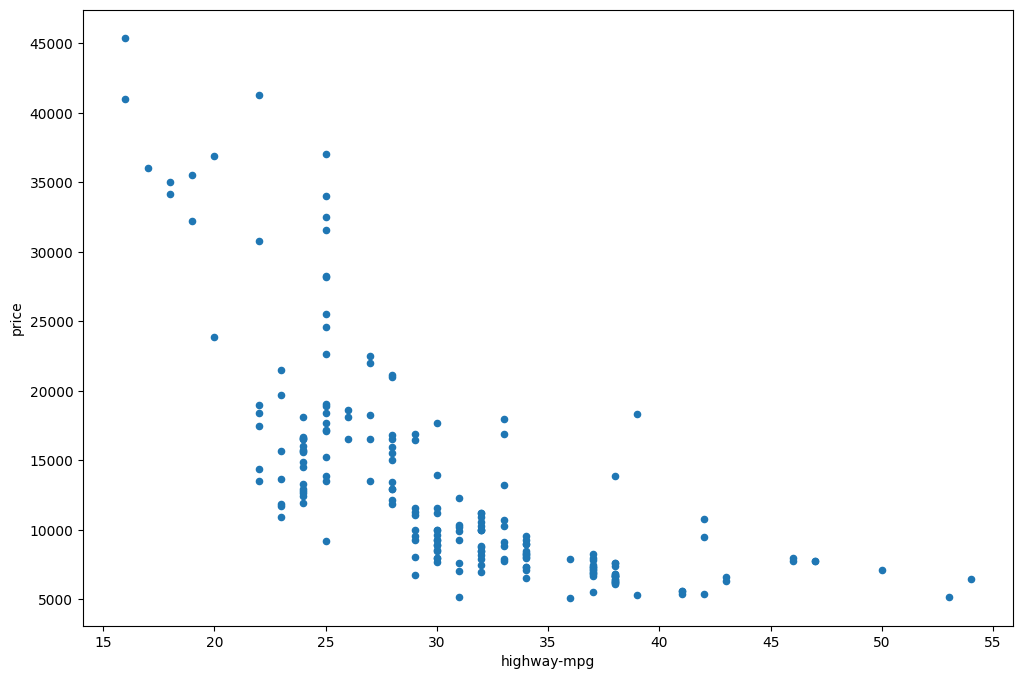

In [24]:
df.plot(kind='scatter', x = 'highway-mpg', y = 'price', figsize=(12,8));

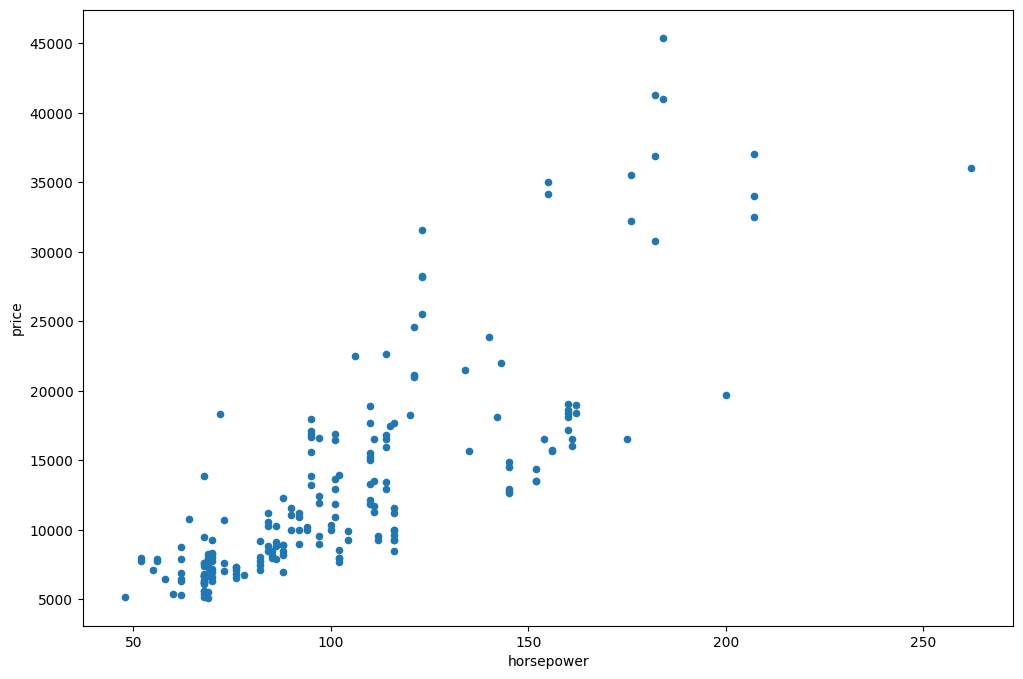

In [25]:
df.plot(kind='scatter', x = 'horsepower', y = 'price', figsize=(12,8));

Of the two features, **engine-size** and **highway per galon** appears a better choice for predicting **price**. Thus we start with a univariate linear regression: ***price = b + m * engine-size***. This can be written as ***Y = b + mX***.

Models require a two-dimensional feature matrix (X, 2darray or a pandas DataFrame) and a one-dimensional target array(Y).

In [26]:
# Extract predictor variable or independent variable
X = df[['engine-size']].values
print(X.shape)

(201, 1)


Similarly, we define our target to be the column **price** in automobile  and assign it in a variable called **Y**

In [27]:
y = df['price'].values
print(y.shape)

(201,)


# Modeling

In [1]:
# Instantiate the Model
model = LinearRegression()

NameError: name 'LinearRegression' is not defined

# Train Test Split

In [29]:
# Split the data into Train and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 1)
(160,)
(41, 1)
(41,)


# Model Fitting

In [30]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Parameter Estimates
The linear regression model has been fitted, what it means is that both parameters, the **intercept** and the **slope**, have been learned. By convention, all model parameters have trailling underscores. For example to access the estimated intercent from the model, rounded to the 2nd decimal place for better display:

In [31]:
model.intercept_.round(2)

-7789.15

Silimarly, the estimated coefficient of **engine-size** is:

In [32]:
model.coef_.round(2)

array([166.58])

The two parameters represent the intercept and slope of the line fit to the data. Out fitted model is ***price = -7789.15 + 100 * engine-size***. For one unit increase in **price**, the price would go up by **8869.22**. 

# Prediction

In [33]:
y_test_pred = model.predict(X_test)
y_test_pred.shape
y_test_pred[:10]

array([12200.90004806,  7203.38742473, 12534.06755628,  7536.55493295,
       16532.07765495,  7536.55493295, 18197.91519606, 12534.06755628,
       14866.24011384,  7203.38742473])

In [34]:
model.intercept_ + model.coef_ * 100

array([8869.22496584])

When the average engine-size is **100**, the model predicts a home value of **8869.22**

This value is the same as we plug in the line b + m * X where **b** is the estimated intercept from the model, and **m** is the estimate slope.

# Model Evaluation

How good is our Model?

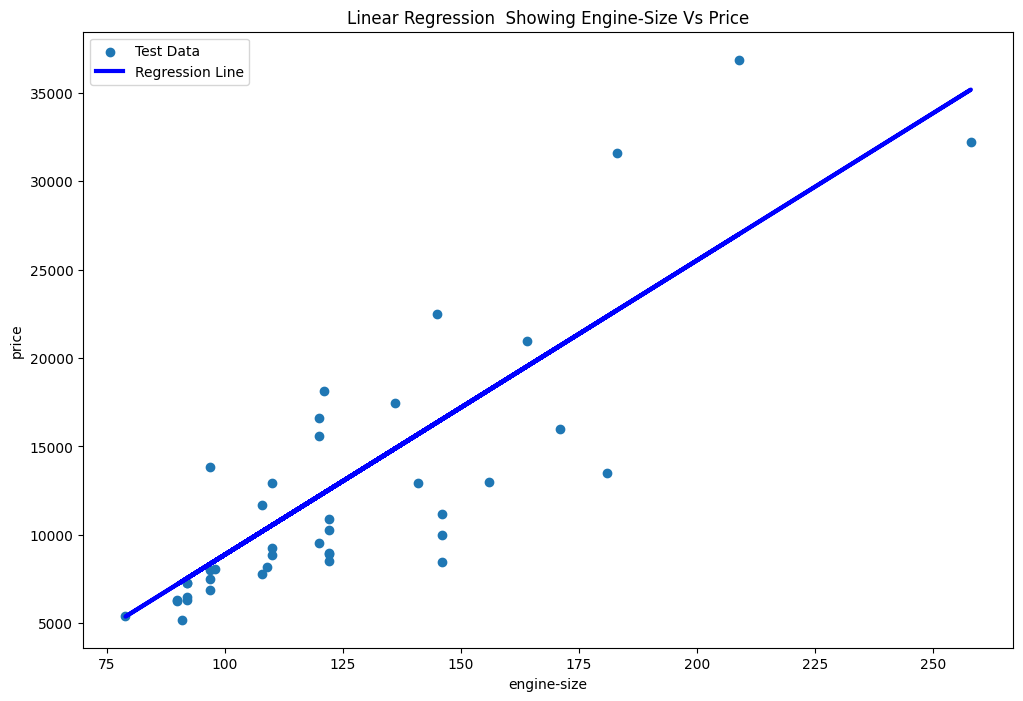

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test, label='Test Data');
plt.plot(X_test, y_test_pred, label='Regression Line', linewidth=3, color="blue")
plt.xlabel('engine-size');
plt.ylabel('price')
plt.title("Linear Regression  Showing Engine-Size Vs Price")
plt.legend(loc='upper left')
plt.show()

## Calculate the residual

Some point sit on the line, but some are away from it. We can measure the distance between a point to the line along the vertical line, and this distance is reffered to as **Residual** or **error.** 

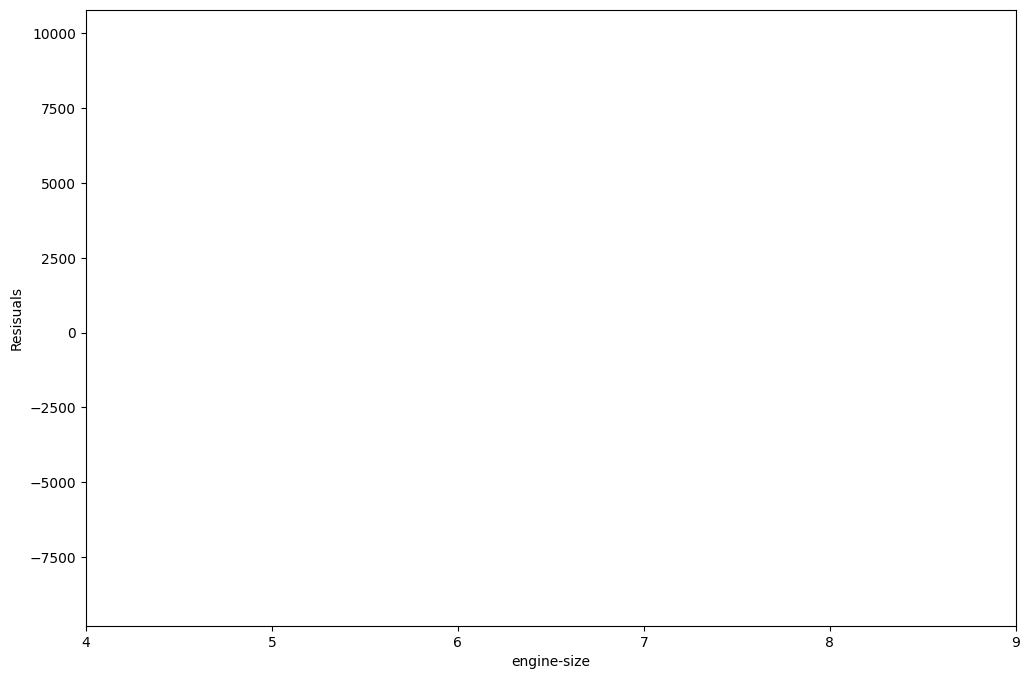

In [39]:

residuals = y_test - y_test_pred

# pot the residuals
plt.figure(figsize=(12,8))
plt.scatter(X_test, residuals)
plt.hlines(y= 0, xmin = X_test.min(), xmax=X_test.max(), linestyle='--', color='red')
# set xlim
plt.xlim((4, 9))
plt.xlabel('engine-size');
plt.ylabel('Resisuals')
plt.show()

In [40]:
residuals.mean()

-682.1136059052768

In [41]:
# Getting the Mean Squared Error
mean_squared_error(y_test, y_test_pred)

16842792.996629857

# R-Squared

It is the proportion of total variations explained by the model. Here, around 60% of variability in the testing data is explained by our model.

# Model score

In [42]:
model.score(X_test, y_test)

0.6821862727918034